<a href="https://colab.research.google.com/github/sokovski/medicine-center-analysis/blob/main/Medicine_center_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Изменение цены лечения в медицинской клинике в 2022 году относительно 2021 года***

Закасчик - медецинский центр. Была поставлена задача проанализировать изменения стоимости услуг.

В ходе работы была проведена предобработка даныных, были выявлены явные дубликаты и разбивка данных на категории.

*Были даны ответы на вопросы:*


*   Как изменялась стоимость ключевых услуг?
*   Граждане какого возвраста приносят больше всего дохода?
* Граждане какого пола чаще проходят обследования?



---

Для анализа был представлен датасет 'data_test_task_2022'  
*Описание данных:*

`record_id` - уникальный идентификатор строки данных  
`service_date` - дата оказания медицинской услуги;  
`service_name` - наименование медицинской услуги;  
`service_number` - количество услуг;  
`service_amount` - сумма выплат (стоимость оказанных услуг в рублях);  
`insured` - уникальный идентификатор пациента;  
`sex_id` - пол пациента (где 1 - мужчина, 2 - женщина);  
`age_for_service_date` - возраст пациента.  


---
Были даны отвветы на такие вопросы:
* Как изменилась выручка? Стала больше или меньше? На сколько процентов
* Какой пол тратит больше всего на врачей и на какие категории услуг?
* Какие категории услуг популярнее?
* Какие категории услуг приносят больше выручки?


In [1]:
#загрузим необходимые библиотеки
import pandas as pd
import numpy as np
import time
from datetime import datetime
from datetime import date, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import math
from pylab import rcParams
from google.colab import files
from pylab import rcParams
rcParams['figure.figsize'] = 15,5
sns.set_palette('Set3') # настройки цветовой палитры для всех графиков из библиотеки seaborn
sns.set_style('whitegrid')

In [2]:
uploaded = files.upload()

Saving data_test_task_2022.xlsx to data_test_task_2022.xlsx


In [3]:
#откроем сам файл и сохраним в переменной data
import io
data = pd.read_excel(io.BytesIO(uploaded['data_test_task_2022.xlsx']))
data.head()

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
0,30268157003,2021-01-24,Прием первичный,1470,1,490777,2.0,26
1,30268157103,2021-01-24,"Взятие материала на посев, цитологическое иссл...",284,1,490777,2.0,26
2,30268157203,2021-01-24,"Посев отдел, дыхательных путей - слизистая зев...",1134,1,490777,2.0,26
3,30268157303,2021-01-24,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,490777,2.0,26
4,30268157403,2021-01-24,Ревматоидный фактор,420,1,490777,2.0,26


In [4]:
#рассмотрим общую информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85369 entries, 0 to 85368
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   record_id             85369 non-null  int64  
 1   service_date          85369 non-null  object 
 2   service_name          85369 non-null  object 
 3   service_amount        85369 non-null  int64  
 4   service_number        85369 non-null  int64  
 5   insured               85369 non-null  int64  
 6   sex_id                85348 non-null  float64
 7   age_for_service_date  85369 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 5.2+ MB


In [5]:
#проверим на явные дубликаты
data.duplicated().sum()

0

In [6]:
#изменим тип данных в столбце service_date
data['service_date'] =pd.to_datetime(data['service_date'])

In [7]:
#рассмотрим пропуски в столбце sex_id
null_data = data[data.isnull().any(axis=1)]
null_data

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
4411,30489299203,2021-03-18,Прием первичный,1470,1,512590,NaN,26
4412,30489299303,2021-03-27,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,512590,NaN,26
4413,30489299403,2021-03-27,Общий анализ мочи,431,1,512590,NaN,26
4414,30489299503,2021-03-27,Альфа-амилаза панкреатическая,287,1,512590,NaN,26
4415,30489299603,2021-03-27,АЛТ (аланинаминотрансфераза),278,1,512590,NaN,26
4416,30489299703,2021-03-27,АСТ (аспартатаминотрансфераза),242,1,512590,NaN,26
4417,30489299803,2021-03-27,Билирубин общий,287,1,512590,NaN,26
4418,30489299903,2021-03-27,ГГТ (гамма - глютамилтрансфераза),287,1,512590,NaN,26
4419,30489300003,2021-03-27,Глюкоза крови,273,1,512590,NaN,26
4420,30489300103,2021-03-27,Фосфотаза щелочная,287,1,512590,NaN,26


In [8]:
#судя по полученным данным, заполним пропуски женским полом
data.fillna(2)

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
0,30268157003,2021-01-24,Прием первичный,1470,1,490777,2.0,26
1,30268157103,2021-01-24,"Взятие материала на посев, цитологическое иссл...",284,1,490777,2.0,26
2,30268157203,2021-01-24,"Посев отдел, дыхательных путей - слизистая зев...",1134,1,490777,2.0,26
3,30268157303,2021-01-24,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,490777,2.0,26
4,30268157403,2021-01-24,Ревматоидный фактор,420,1,490777,2.0,26
...,...,...,...,...,...,...,...,...
85364,33178146803,2022-08-20,Общий анализ мочи,495,1,935341,2.0,30
85365,33178146903,2022-08-20,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",800,1,935341,2.0,30
85366,33178147003,2022-08-20,АЧТВ (активированное частичное тромбопластинов...,300,1,935341,2.0,30
85367,33178147103,2022-08-20,Протромбин (МНО),410,1,935341,2.0,30


In [9]:
#посмотрим на уникальные услуги
data['service_name'].unique()

array(['Прием первичный',
       'Взятие материала на посев, цитологическое исследование ( риноцитограмма)',
       'Посев отдел, дыхательных путей - слизистая зева с определением чувствительности к антибиотикам',
       'Общий анализ крови (лейкоцитарная форм,, СОЭ)',
       'Ревматоидный фактор', 'С-реактивный белок',
       'Взятие крови из периферической вены', 'Магнитотерапия (1 сеанс)',
       'УВЧ-терапия (1 сеанс) (1 поле)', 'Прием повторный',
       'Смазывание глотки лекарственными формами', 'Взятие мазка',
       'Обработка вульвы', 'Обработка шейки матки',
       'Гинекологический мазок', 'Общий анализ мочи', 'Креатинин',
       'Мочевая кислота', 'Мочевина', 'Общий белок',
       'Ультразвуковое исследование почек и надпочечников',
       'Ультразвуковое исследование мочевого пузыря',
       'ЛПНП (липопротеиды низкой плотности, бета-липопротеиды)',
       'Триглицериды', 'Холестерин', 'АЛТ (аланинаминотрансфераза)',
       'Альдостерон', 'Кортизол (кровь)', 'Ренин + Ангио

In [10]:
#для удобства приведем все к нижнему регистру
data['service_name'] = data['service_name'].str.lower()


In [11]:
#и разобьем услуги на основные категории
def сategory_of_service(row):
    if 'первичный' in row['service_name']:
        return 'Первичный прием'
    elif 'цифровая' in row['service_name']:
        return 'Рентген'
    elif 'посев' in row['service_name']:
        return 'Анализы'
    elif 'анализ' in row['service_name']:
        return 'Анализы'
    elif 'фактор' in row['service_name']:
        return 'Анализы'
    elif 'крови' in row['service_name']:
        return 'Анализы'
    elif 'кровь' in row['service_name']:
        return 'Анализы'
    elif 'билирубин' in row['service_name']:
        return 'Анализы'
    elif 'igg' in row['service_name']:
        return 'Анализы'
    elif 'igm' in row['service_name']:
        return 'Анализы'
    elif 'ультразвуковая' in row['service_name']:
        return 'УЗИ'
    elif 'ультразвуковое' in row['service_name']:
        return 'УЗИ'
    elif 'дуплексное' in row['service_name']:
        return 'УЗИ'
    elif 'обработка' in row['service_name']:
        return 'Процедура'
    elif 'повторный' in row['service_name']:
        return 'Повторный прием'
    elif 'смазывание' in row['service_name']:
        return 'Процедура'
    elif 'терап' in row['service_name']:
        return 'Терапия'
    elif 'взятие' in row['service_name']:
        return 'Процедура'
    elif 'мочев' in row['service_name']:
        return 'Анализы'
    elif 'белок' in row['service_name']:
        return 'Анализы'
    elif 'мазок' in row['service_name']:
        return 'Процедура'
    elif 'массаж' in row['service_name']:
        return 'Терапия'
    elif 'токи' in row['service_name']:
        return 'Терапия'
    elif 'осмотр' in row['service_name']:
        return 'Контрольный осмотр'
    elif 'сеанс' in row['service_name']:
        return 'Терапия'
    elif 'удаление' in row['service_name']:
        return 'Хирургическая процедура'
    elif 'рентгенография' in row['service_name']:
        return 'Рентген'
    elif 'св' in row['service_name']:
        return 'Анализы'
    elif 'алт' in row['service_name']:
        return 'Анализы'
    elif 'аст' in row['service_name']:
        return 'Анализы'
    elif 'рнк' in row['service_name']:
        return 'Анализы'
    elif 'очк' in row['service_name']:
        return 'Офтольмология'
    elif 'зрен' in row['service_name']:
        return 'Офтольмология'
    elif 'глаз' in row['service_name']:
        return 'Офтольмология'
    elif 'наложение' in row['service_name']:
        return 'Процедура'
    elif 'соскоб' in row['service_name']:
        return 'Анализы'
    elif 'фосфотаза' in row['service_name']:
        return 'Анализы'
    elif 'ттг' in row['service_name']:
        return 'Анализы'
    elif 'креатинин' in row['service_name']:
        return 'Анализы'
    elif 'кал' in row['service_name']:
        return 'Анализы'
    elif 'экг' in row['service_name']:
        return 'ЭКГ'
    elif 'протромбин' in row['service_name']:
        return 'Анализы'
    elif 'гепатит' in row['service_name']:
        return 'Анализы'
    elif 'лпнп' in row['service_name']:
        return 'Анализы'
    elif 'холестирин' in row['service_name']:
        return 'Анализы'
    elif 'триглицериды' in row['service_name']:
        return 'Анализы'
    elif 'ренин' in row['service_name']:
        return 'Анализы'
    elif 'ферритин' in row['service_name']:
        return 'Анализы'
    elif 'рефрактометрия' in row['service_name']:
        return 'Анализы'
    elif 'снятие' in row['service_name']:
        return 'Процедура'
    elif 'ведущего' in row['service_name']:
        return 'Прием топ врача'
    elif 'эксперт' in row['service_name']:
        return 'Прием топ врача'
    elif 'промывание' in row['service_name']:
        return 'Процедура'
    elif 'лг' in row['service_name']:
        return 'Анализы'
    elif 'инсулин' in row['service_name']:
        return 'Анализы'
    elif 'ггт' in row['service_name']:
        return 'Анализы'
    elif 'пролактин' in row['service_name']:
        return 'Анализы'
    elif 'витамин' in row['service_name']:
        return 'Анализы'
    elif 'пульсоксиметрия' in row['service_name']:
        return 'Анализы'
    elif 'исследование сока простаты' in row['service_name']:
        return 'Анализы'
    elif 'перевязка' in row['service_name']:
        return 'Процедура'
    elif 'вакцинация' in row['service_name']:
        return 'Вакцинация'
    elif 'фсг' in row['service_name']:
        return 'Анализы'
    elif 'кольпоскопия' in row['service_name']:
        return 'Процедура'
    elif 'анемизация' in row['service_name']:
        return 'Процедура'
    elif 'пса' in row['service_name']:
        return 'Анализы'
    elif 'спирография' in row['service_name']:
        return 'Процедура'
    elif 'инстилляция' in row['service_name']:
        return 'Процедура'
    elif 'альдостерон' in row['service_name']:
        return 'Анализы'
    elif 'гемоглобин' in row['service_name']:
        return 'Анализы'
    elif 'скиаскопия' in row['service_name']:
        return 'Процедура'
    elif 'трансферрин' in row['service_name']:
        return 'Анализы'
    elif 'альфа-амилаза' in row['service_name']:
        return 'Анализы'
    elif 'холестерин' in row['service_name']:
        return 'Анализы'
    elif 'на дому' in row['service_name']:
        return 'Прием на дому'
    elif 'псих' in row['service_name']:
        return 'Прием психотерапевта'
    elif 'постановка' in row['service_name']:
        return 'Процедура'
    elif 'тест' in row['service_name']:
        return 'Исследование'
    elif 'расшифровка' in row['service_name']:
        return 'Расшифровка исследования'
    elif 'анестезия' in row['service_name']:
        return 'Процедура'
    elif 'исследование отделяемого молочной железы' in row['service_name']:
        return 'Анализы'
    elif 'инъекция' in row['service_name']:
        return 'Процедура'
    elif 'педиат' in row['service_name']:
        return 'Прием педиатора'
    elif 'натрий' in row['service_name']:
        return 'Анализы'
    elif 'магний' in row['service_name']:
        return 'Анализы'
    elif 'вич' in row['service_name']:
        return 'Анализы'
    elif 'железо' in row['service_name']:
        return 'Анализы'
    elif 'функция' in row['service_name']:
        return 'Исследование'
    elif 'исследование' in row['service_name']:
        return 'Исследование'
    elif 'кортизол' in row['service_name']:
        return 'Анализы'
    elif 'консультация' in row['service_name']:
        return 'Консультация'
    elif 'туалет' in row['service_name']:
        return 'Процедура'
    elif 'тромбиновое время' in row['service_name']:
        return 'Исследование'
    elif 'фибриноген' in row['service_name']:
        return 'Анализы'
    elif 'альбумин' in row['service_name']:
        return 'Анализы'
    elif 'фолиевая кислота' in row['service_name']:
        return 'Анализы'
    elif 'аноскопия' in row['service_name']:
        return 'Анализы'
    elif 'общ' in row['service_name']:
        return 'Анализы'
    elif 'лпвп' in row['service_name']:
        return 'Анализы'
    elif 'ат к тпо' in row['service_name']:
        return 'Анализы'
    elif 'пункц' in row['service_name']:
        return 'Процедура'
    elif 'узи' in row['service_name']:
        return 'УЗИ'
    elif 'руководителя' in row['service_name']:
        return 'Прием топ врача'
    elif 'эндоскоп' in row['service_name']:
        return 'Процедура'
    elif 'продув' in row['service_name']:
        return 'Процедура'
    elif 'мскт' in row['service_name']:
        return 'Процедура'
    elif 'тимпанометрия' in row['service_name']:
        return 'Исследование'
    elif 'лейкоцит' in row['service_name']:
        return 'Анализы'
    elif 'метод определения' in row['service_name']:
        return 'Исследование'
    elif 'применение' in row['service_name']:
        return 'Процедура'
    elif 'введение' in row['service_name']:
        return 'Процедура'
    elif 'блокада' in row['service_name']:
        return 'Процедура'
    elif 'соэ' in row['service_name']:
        return 'Анализы'
    elif 'toxoplasma' in row['service_name']:
        return 'Анализы'
    elif 'инстиляция' in row['service_name']:
        return 'Процедура'
    elif 'гидроксипрогестерон' in row['service_name']:
        return 'Анализы'
    elif 'дегидроэпиандростерон' in row['service_name']:
        return 'Анализы'
    elif 'прогестерон' in row['service_name']:
        return 'Анализы'
    elif 'эстрадиол' in row['service_name']:
        return 'Анализы'
    elif 'периметрия' in row['service_name']:
        return 'Исследование'
    elif 'chlamydia pneumoniae iga' in row['service_name']:
        return 'Анализы'
    elif 'антитела' in row['service_name']:
        return 'Анализы'
    elif 'водно-сифонная проба' in row['service_name']:
        return 'УЗИ'
    elif 'мрт' in row['service_name']:
        return 'Исследование'
    elif 'санация' in row['service_name']:
        return 'Процедура'
    elif 'урофлуометрия' in row['service_name']:
        return 'Исследование'
    elif 'манту' in row['service_name']:
        return 'Исследование'
    elif 'фосфор' in row['service_name']:
        return 'Анализы'
    elif 'днк впч' in row['service_name']:
        return 'Анализы'
    elif 'проба с флюоресцином' in row['service_name']:
        return 'Анализы'
    elif 'слюна' in row['service_name']:
        return 'Анализы'
    elif 'биопсия' in row['service_name']:
        return 'Исследование'
    elif 'паратиреоидный гормон' in row['service_name']:
        return 'Анализы'
    elif 'асло' in row['service_name']:
        return 'Анализы'
    elif 'антиген' in row['service_name']:
        return 'Анализы'
    elif 'прижигание' in row['service_name']:
        return 'Процедура'
    elif 'колоноскопия' in row['service_name']:
        return 'Процедура'
    elif 'ат к' in row['service_name']:
        return 'Анализы'
    elif 'вливание' in row['service_name']:
        return 'Процедура'
    elif 'лечение' in row['service_name']:
        return 'Процедура'
    elif 'риноцитограмма' in row['service_name']:
        return 'Исследование'
    elif 'флороценоз' in row['service_name']:
        return 'Анализы'
    elif 'хгч' in row['service_name']:
        return 'Анализы'
    elif 'вскрытие' in row['service_name']:
        return 'Процедура'
    elif 'иммобилизация' in row['service_name']:
        return 'Процедура'
    elif 'аспирация' in row['service_name']:
        return 'Процедура'
    elif 'стимуляция' in row['service_name']:
        return 'Процедура'
    elif 'ретикулоциты' in row['service_name']:
        return 'Анализы'
    elif 'экспресс' in row['service_name']:
        return 'Исследование'
    elif 'лфк' in row['service_name']:
        return 'Лечебная физкультура'
    elif 'лечебной' in row['service_name']:
        return 'Лечебная физкультура'
    elif 'интерпретация' in row['service_name']:
        return 'Расшифровка исследования'
    elif 'ige' in row['service_name']:
        return 'Анализы'
    elif 'клещ' in row['service_name']:
        return 'Анализы'
    elif 'белк' in row['service_name']:
        return 'Анализы'
    elif 'т4' in row['service_name']:
        return 'Анализы'
    elif 'т3' in row['service_name']:
        return 'Анализы'
    elif 'эпител' in row['service_name']:
        return 'Анализы'
    elif 'протеин' in row['service_name']:
        return 'Анализы'
    elif 'анти' in row['service_name']:
        return 'Анализы'
    elif 'эхоэ' in row['service_name']:
        return 'Исследование'
    elif 'плесень' in row['service_name']:
        return 'Анализы'
    elif 'протромбин' in row['service_name']:
        return 'Анализы'
    elif 'нейросонография с дуплексным сканированием' in row['service_name']:
        return 'УЗИ'
    elif 'д-димер' in row['service_name']:
        return 'Анализы'
    elif 'аудиометрия' in row['service_name']:
        return 'Исследование'
    elif 'креатинкиназа' in row['service_name']:
        return 'Анализы'
    elif 'келл' in row['service_name']:
        return 'Анализы'
    elif 'липаза' in row['service_name']:
        return 'Анализы'
    elif 'хлор' in row['service_name']:
        return 'Анализы'
    elif 'аппликация' in row['service_name']:
        return 'Процедура'
    elif 'iga' in row['service_name']:
        return 'Анализы'
    elif 'электронейромиография' in row['service_name']:
        return 'Исследование'
    elif 'обнаружение энтеровируса' in row['service_name']:
        return 'Анализы'
    elif 'пыльца' in row['service_name']:
        return 'Анализы'
    elif 'профессор' in row['service_name']:
        return 'Прием топ врача'
    elif 'шинирование' in row['service_name']:
        return 'Процедура'
    elif 'скрининг' in row['service_name']:
        return 'Процедура'
    elif 'вестибулярны' in row['service_name']:
        return 'Исследование'
    elif 'цистоскопия' in row['service_name']:
        return 'Исследование'
    elif 'криодеструкция' in row['service_name']:
        return 'Хирургическая процедура'
    elif 'уретро' in row['service_name']:
        return 'Процедура'
    elif 'тампонада' in row['service_name']:
        return 'Процедура'
    elif 'иммунный статус' in row['service_name']:
        return 'Исследование'
    elif 'ларингоскопия' in row['service_name']:
        return 'Процедура'
    elif 'сифилис' in row['service_name']:
        return 'Анализы'
    elif 'перо' in row['service_name']:
        return 'Анализы'
    elif 'таракан' in row['service_name']:
        return 'Анализы'
    elif 'агрегация' in row['service_name']:
        return 'Исследование'
    elif 'са-72-4' in row['service_name']:
        return 'Анализы'
    elif 'кислота' in row['service_name']:
        return 'Анализы'
    elif 'глобулин' in row['service_name']:
        return 'Анализы'
    elif 'ктг' in row['service_name']:
        return 'Процедура'
    elif 'цинк' in row['service_name']:
        return 'Анализы'
    elif 'актг' in row['service_name']:
        return 'Анализы'
    elif 'катетеризация' in row['service_name']:
        return 'Хирургическая процедура'
    elif 'латекс' in row['service_name']:
        return 'Анализы'
    elif 'репозиция' in row['service_name']:
        return 'Хирургическая процедура'
    elif 'коагуляция' in row['service_name']:
        return 'Хирургическая процедура'
    else:
        return 'другое'


In [12]:
#применим категории
data['category'] = data.apply(сategory_of_service, axis=1)

In [13]:
#посмотрим что получилось
data


,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,category
0,30268157003,2021-01-24,прием первичный,1470,1,490777,2.0,26,Первичный прием
1,30268157103,2021-01-24,"взятие материала на посев, цитологическое иссл...",284,1,490777,2.0,26,Анализы
2,30268157203,2021-01-24,"посев отдел, дыхательных путей - слизистая зев...",1134,1,490777,2.0,26,Анализы
3,30268157303,2021-01-24,"общий анализ крови (лейкоцитарная форм,, соэ)",693,1,490777,2.0,26,Анализы
4,30268157403,2021-01-24,ревматоидный фактор,420,1,490777,2.0,26,Анализы
...,...,...,...,...,...,...,...,...,...
85364,33178146803,2022-08-20,общий анализ мочи,495,1,935341,2.0,30,Анализы
85365,33178146903,2022-08-20,"общий анализ крови (лейкоцитарная форм,, соэ)",800,1,935341,2.0,30,Анализы
85366,33178147003,2022-08-20,ачтв (активированное частичное тромбопластинов...,300,1,935341,2.0,30,Анализы
85367,33178147103,2022-08-20,протромбин (мно),410,1,935341,2.0,30,Анализы


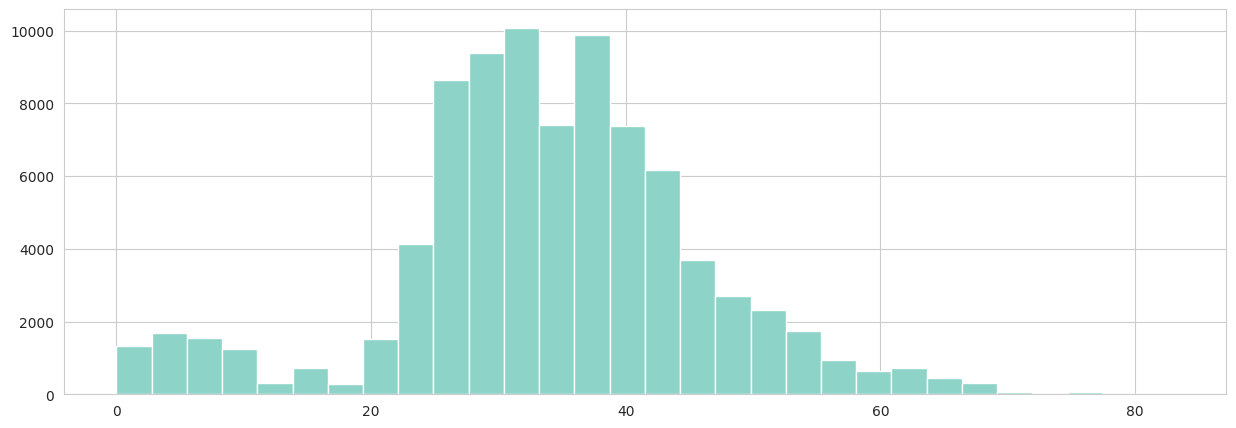

In [14]:
#рассмотрим разброс по возрасту
data['age_for_service_date'].hist(bins=30)
plt.show()

Видим, что основные пациенты в возрасте от 20 до 40 лет. Преимущественно в возрасте 35 лет

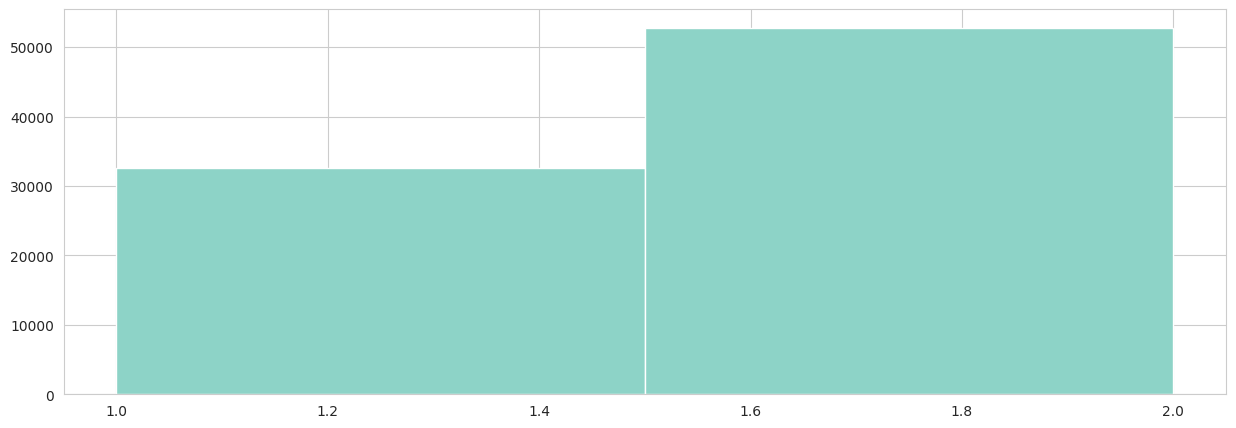

In [15]:
#посмотрим на разброс по полу
data['sex_id'].hist(bins=2)
plt.show()

Как и ожидалось, основные клиенты - женщины

In [16]:
#рассмотрим данные о стоимости услуг
data['service_amount'].describe()

count    85369.000000
mean      1166.094636
std        799.062660
min        147.000000
25%        550.000000
50%       1155.000000
75%       1530.000000
max      26999.000000
Name: service_amount, dtype: float64

In [17]:
#имеем одно явно выбивающееся событие,
#рассмотрим нет ли ошибки в данных

strange = data.query('service_amount == 26999')
strange

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,category
18519,30961787103,2021-06-24,"гистерорезектоскопия при полипах , рдв",26999,1,362928,2.0,51,другое


В целом, учитывя что данная процедура явлется хирургическим вмешательством не самого простого характера, данная стоимость уместна.

In [18]:
#разделим датасет на 2 вспомогательных по годам
data_21 = data[(data['service_date'] >= '2021-01-01') & (data['service_date'] <= '2021-12-31')]
data_21

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,category
0,30268157003,2021-01-24,прием первичный,1470,1,490777,2.0,26,Первичный прием
1,30268157103,2021-01-24,"взятие материала на посев, цитологическое иссл...",284,1,490777,2.0,26,Анализы
2,30268157203,2021-01-24,"посев отдел, дыхательных путей - слизистая зев...",1134,1,490777,2.0,26,Анализы
3,30268157303,2021-01-24,"общий анализ крови (лейкоцитарная форм,, соэ)",693,1,490777,2.0,26,Анализы
4,30268157403,2021-01-24,ревматоидный фактор,420,1,490777,2.0,26,Анализы
...,...,...,...,...,...,...,...,...,...
44387,31814305203,2021-12-09,взятие секрета предстательной железы,380,1,568887,1.0,39,Процедура
44388,31814305303,2021-12-09,взятие мазка,360,1,568887,1.0,39,Процедура
44389,31814305403,2021-12-09,урофлуометрия,950,1,568887,1.0,39,Исследование
44390,31814305503,2021-12-09,исследование сока простаты,460,1,568887,1.0,39,Анализы


In [19]:
data_22 = data[(data['service_date'] >= '2022-01-01') & (data['service_date'] <= '2022-12-31')]
data_22

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,category
44392,31996230303,2022-01-11,магнитотерапия (1 сеанс),1090,1,625892,1.0,33,Терапия
44393,31996230403,2022-01-11,смт-форез (1 сеанс) (2 поля),950,1,625892,1.0,33,Терапия
44394,31996230503,2022-01-18,"прием невролога, повторный",1380,1,625892,1.0,33,Повторный прием
44395,31996230603,2022-01-18,магнитотерапия (1 сеанс),1090,1,625892,1.0,33,Терапия
44396,31996230703,2022-01-18,"прием физиотерапевта, повторный",1380,1,625892,1.0,33,Повторный прием
...,...,...,...,...,...,...,...,...,...
85364,33178146803,2022-08-20,общий анализ мочи,495,1,935341,2.0,30,Анализы
85365,33178146903,2022-08-20,"общий анализ крови (лейкоцитарная форм,, соэ)",800,1,935341,2.0,30,Анализы
85366,33178147003,2022-08-20,ачтв (активированное частичное тромбопластинов...,300,1,935341,2.0,30,Анализы
85367,33178147103,2022-08-20,протромбин (мно),410,1,935341,2.0,30,Анализы


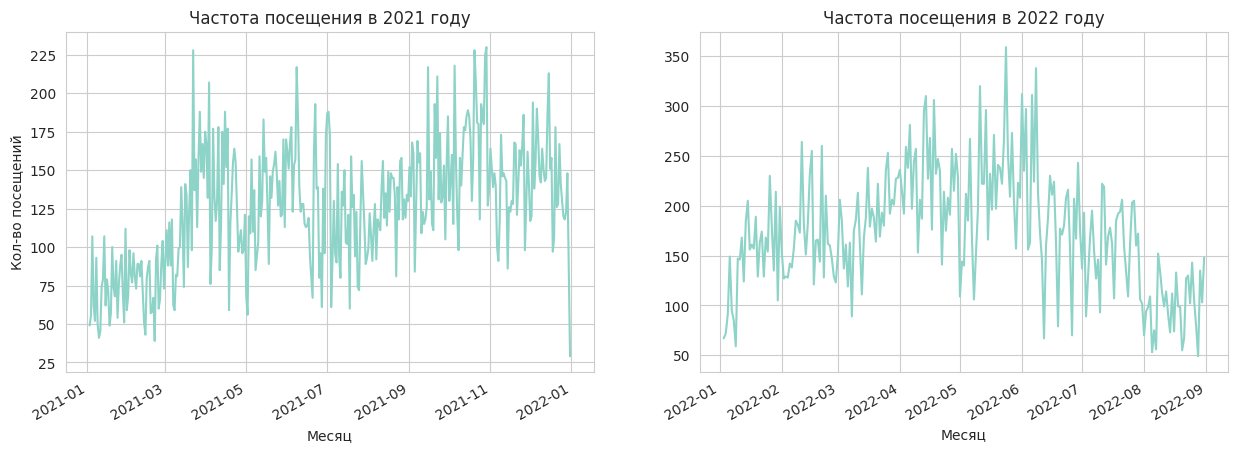

In [20]:
#посмотрим на "плотность" посещений для разных годов
data_21.pivot_table(index='service_date',
                     values='service_number',
                     aggfunc='sum').plot(grid=True,
                                         legend=False,
                                         ax = plt.subplot(1,2,1))
plt.title('Частота посещения в 2021 году')
plt.xlabel('Месяц')
plt.ylabel('Кол-во посещений')
data_22.pivot_table(index='service_date',
                     values='service_number',
                     aggfunc='sum').plot(grid=True,
                                         legend=False,
                                         ax = plt.subplot(1,2,2))
plt.title('Частота посещения в 2022 году')
plt.xlabel('Месяц')
plt.show()

Видим, что в 2021 году кол-во посещений еле еле превышало 225 за день (это даже учитывая то, что у нас есть не все данные за 2022 год). При этом в 2022 году эта цифра поднялась до 350 посещений в день.
Так же видим некоторую сезонность. Повышение активности в апреле и мае (что в 2021 году так и в 2022). Небольшая просадка летом  вплоть до сентября.

Так как в таблице 2022 года у нас собраны данные не за целый год, будет справедливым  "обрезать" датасет за 2021 до той же даты 2022 года.

In [21]:
data_2021_refresh = data_21[(data_21['service_date'] >= '2021-01-01') & (data_21['service_date'] <= '2021-08-31')]
display(data_2021_refresh)

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,category
0,30268157003,2021-01-24,прием первичный,1470,1,490777,2.0,26,Первичный прием
1,30268157103,2021-01-24,"взятие материала на посев, цитологическое иссл...",284,1,490777,2.0,26,Анализы
2,30268157203,2021-01-24,"посев отдел, дыхательных путей - слизистая зев...",1134,1,490777,2.0,26,Анализы
3,30268157303,2021-01-24,"общий анализ крови (лейкоцитарная форм,, соэ)",693,1,490777,2.0,26,Анализы
4,30268157403,2021-01-24,ревматоидный фактор,420,1,490777,2.0,26,Анализы
...,...,...,...,...,...,...,...,...,...
26731,31249631403,2021-08-28,прием повторный,1313,1,210812,1.0,24,Повторный прием
26732,31249631503,2021-08-12,прием повторный,1313,1,651988,2.0,36,Повторный прием
26733,31249631603,2021-08-27,железо сывороточное,287,1,651988,2.0,36,Анализы
26734,31249631703,2021-08-27,ожсс (общая железосвязывающая способность),242,1,651988,2.0,36,Анализы


In [22]:
#посмотрим на выручки за 2021 и 2022 год
print('Выручка за 2021 год:', data_2021_refresh['service_amount'].sum())
print('Выручка за 2022 год:', data_22['service_amount'].sum())
print('Рост выручки', round(data_22['service_amount'].sum() / data_2021_refresh['service_amount'].sum(), 2)*100 )

Выручка за 2021 год: 29957552
Выручка за 2022 год: 48986662
Рост выручки 164.0


Видим, что за один и тот же промежуток времени (с января по конец августа) выручка за 22 год выросла на 64% по сравнению с 2021


In [23]:
#рассмотрим средний чек для каждого года
print('Средний чек 2021 года:', round(data_2021_refresh['service_amount'].mean(), 2))
print('Средний чек 2022 года:', round(data_22['service_amount'].mean(), 2))

Средний чек 2021 года: 1120.49
Средний чек 2022 года: 1195.47


Так же средний чек поднялся на 75 рублей.

In [24]:
sns.set_palette('Set3', n_colors=18, desat=None, color_codes=False)

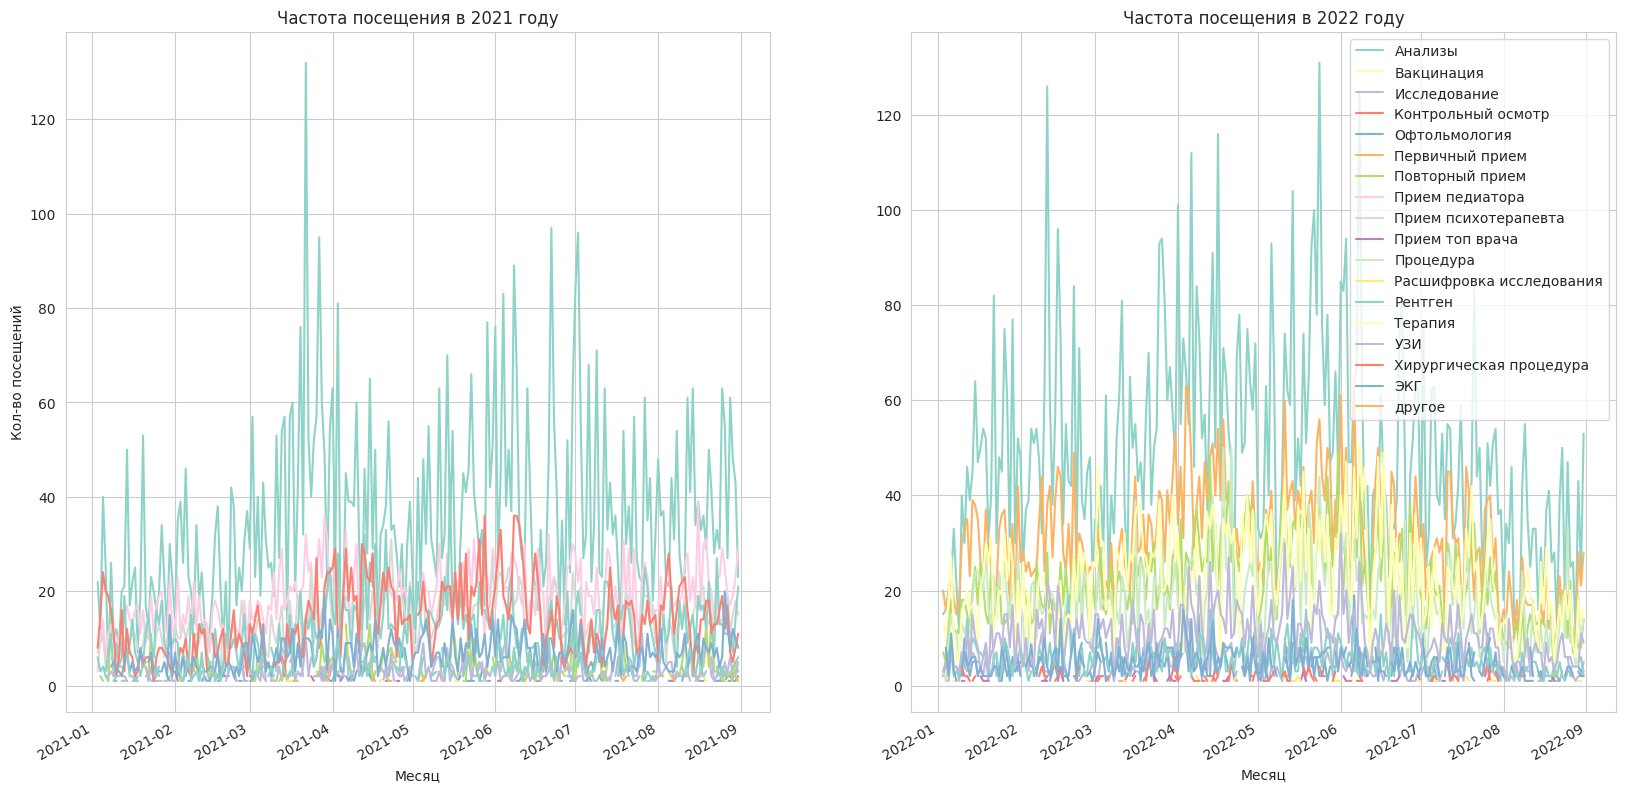

In [25]:
#рассмотрим посещения по основным направлениям
plt.figure(figsize=(20,10))
data_2021_refresh.pivot_table(index='service_date',
                     columns = 'category',
                     values='service_number',
                     aggfunc='sum').plot(grid=True,
                                         legend=False,
                                         ax = plt.subplot(1,2,1))
plt.title('Частота посещения в 2021 году')
plt.xlabel('Месяц')
plt.ylabel('Кол-во посещений')
data_22.pivot_table(index='service_date',
                      columns='category',
                     values='service_number',
                     aggfunc='sum').plot(grid=True,
                                         legend=True,
                                         ax = plt.subplot(1,2,2))
plt.legend(bbox_to_anchor=(1,1), loc='upper right')
plt.title('Частота посещения в 2022 году')
plt.xlabel('Месяц')
plt.show()

In [26]:
#посмотрим на кол-во посещений по годам
#так же посмотрим прирост посещений
#делаем сводную посещений за 21 год
pivot_service_21 = data_2021_refresh.pivot_table(index='category',
                     values='service_number',
                     aggfunc='sum').sort_values(by='service_number', ascending=False)
pivot_service_21 = pivot_service_21.rename(columns={'service_number':'2021'})

#делаем сводную посещений за 22 год
pivot_service_22 = data_22.pivot_table(index='category',
                     values='service_number',
                     aggfunc='sum').sort_values(by='service_number', ascending=False)
pivot_service_22 = pivot_service_22.rename(columns={'service_number': '2022'})
pivot_service_22

#объединяем их и рассчитываем процент прироста,
#где 100 и больше - положительный рост,
#а меньшше 100 - отрицательный
pivot_service = pivot_service_21.merge(pivot_service_22, how='inner', on='category')
pivot_service['height'] = round(pivot_service['2022'] / pivot_service['2021'] * 100, 1)
pivot_service

,2021,2022,height
category,,,
Анализы,8683,11949,137.6
Первичный прием,4600,7361,160.0
Повторный прием,3377,5242,155.2
Терапия,3256,5467,167.9
Процедура,2841,4363,153.6
УЗИ,1601,2583,161.3
Офтольмология,702,890,126.8
Рентген,677,1378,203.5
ЭКГ,630,1044,165.7


Видим, что кол-во проведенных анализов увеличилось на 60%, так же пациенты стали чаще посещать терапии, проводили исследования. Так же заметен рост в 2 раза по нраправлению рентген и хирургия. Так же пациенты стали чаще выбирать прием у топ врачей(ведущие врачи)

In [27]:
#посмотрим насколько изменилась за год цена на основные услуги
#начнем со стоимости первичного приема
cost_21 = data_2021_refresh[data_2021_refresh.service_name.str.contains('первичный')]
cost_21 = cost_21['service_amount'].median()


cost_22 = data_22[data_22.service_name.str.contains('первичный')]
cost_22 = cost_22['service_amount'].median()

print('Стоимость первичного приема в 2021 году:', cost_21, 'руб.')
print('Стоимость первичного приему в 2022 году:', cost_22, 'руб.')

Стоимость первичного приема в 2021 году: 1470.0 руб.
Стоимость первичного приему в 2022 году: 1540.0 руб.


Видим, что стоимость первичного приема увеличилась на 70 рублей.

In [28]:
#посмотрим, как изменилась стоимость повторного приема
cost_21_return = data_2021_refresh[data_2021_refresh.service_name.str.contains('повторный')]
cost_21_return = cost_21_return['service_amount'].median()

cost_22_return = data_22[data_22.service_name.str.contains('повторный')]
cost_22_return = cost_22_return['service_amount'].median()

print('Стоимость повторного приема в 2021 году:', cost_21_return)
print('Стоимость повторного приема в 2022 году:', cost_22_return)

Стоимость повторного приема в 2021 году: 1313.0
Стоимость повторного приема в 2022 году: 1380.0


Так же видим, что и стоимость повторного приема изменилась почти на 70 рублей

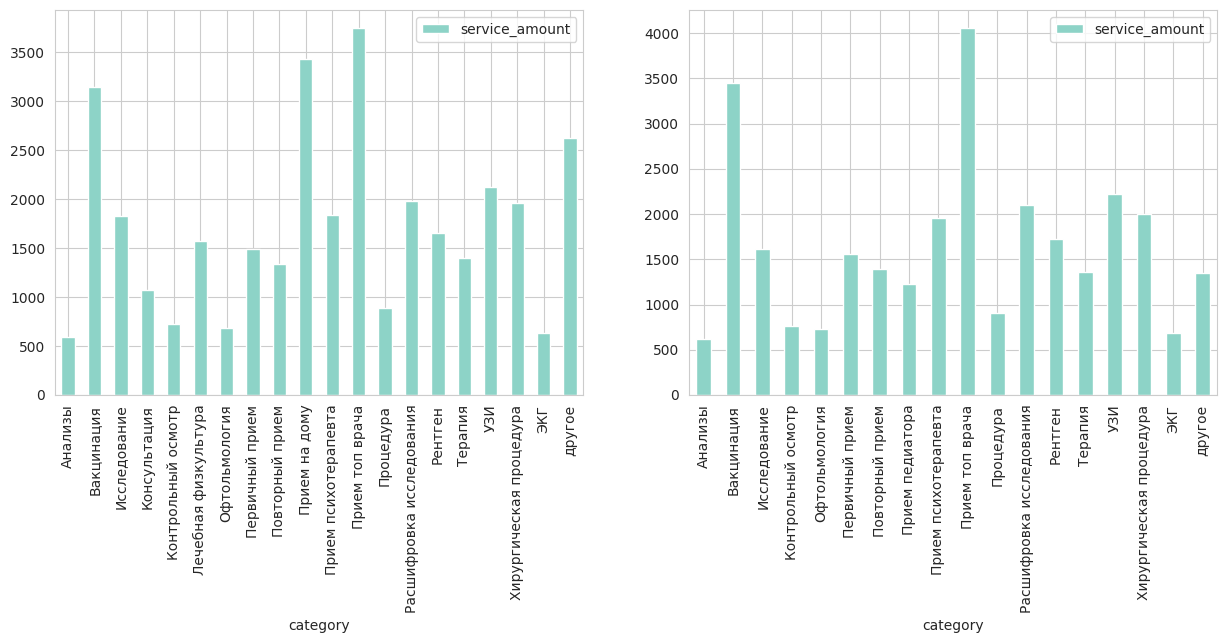

In [29]:
#посмотрим, как в целом изменялась медианная стоимость на услуги в разрезе годов

data_21.pivot_table(index='category',
                    values='service_amount',
                    aggfunc='mean').plot(grid=True,
                                         kind='bar',
                                         ax=plt.subplot(1,2,1))
data_22.pivot_table(index='category',
                    values='service_amount',
                    aggfunc='mean').plot(grid=True,
                                         kind='bar',
                                         ax=plt.subplot(1,2,2))

plt.show()

Из данного графика можно сделать вывод, что базовые услуги (анализы, узи, рентген и тд.) не сильно изменились в цене. А вот прием у ведущего врача увеличился примерно на 250 рублей.

In [30]:
#сохраним полученные таблицы для работы в Tableau
data_22.to_csv('data_22.csv', index=False)

In [31]:
from google.colab import files
files.download("data_22.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
data_2021_refresh.to_csv('data_2021_refresh.csv', index=False)
from google.colab import files
files.download("data_2021_refresh.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ссылка на Tableau: https://public.tableau.com/app/profile/darya.sokolova/viz/Medicineanalytics/Dashboard1?publish=yes

Ссылка на презентацию: https://disk.yandex.com.am/i/BhgM5Yn1e9P3GQ

# **Вывод**

В ходе работы была проведена предобработка данных, так же были выявлены явные дубликаты. Был изменен тип данных там, где это требовалось.  
Так же исходные данные были разбиты на 2 таблицы по годам и таблица за 2021 год была урезана до даты наличия информации за 2022 год для чистоты данных.


***Как изменилась выручка? Стала больше или меньше? На сколько процентов.***  
Сравнивая выручки за период с 1 января по 31 августа каждого года, мы пришли к выводу, что за 2022 год выручка выросла на 64% по сравнению с предыдущим годом. Скорее всего, это связано с увеличением цены на услуги. Так как средний чек поднялся на 75 рублей (7% от среднего чека 21 года). Так же и стоимость первичного и повторного приема на 70 рублей каждая. Да и в целом если смотреть на динамику цены, то все категории стали дороже. Это можно связать с ситуацией в стране, уходом из России многих компаний, подорожанием химикатов для проведения анализов и общим ростом инфляции.


***Какие категории услуг приносят больше выручки?***  
Исходя из графиков, построенных в Tableau, что в 21, что в 22 году основную выручку приносят Первичные приемы. Рекордные значения - в августе 21 года - 998 тыс. В апреле 22 года - 1 886 480. Так же можно заметить сезонность спроса на услуги. В 2022 году большая часть спроса пришлась на до летнее время (Апрель - Май). А в феврале 21 года компания только начала набирать обороты, поэтому нет такого явного скачка в показателях.  
Так же за счет большого спроса в топ услуг по выручке входят анализы. Повторные приемы так же попадают в эту категорию. Терапия и УЗИ так же приносят порядка 500-600 к (за 22 год).

***Какие категории услуг популярнее?***  
Исследуя графики, построенные в Tableau, можно сделать вывод, что чаще всего пациенты сдают анализы в данной клинике. Учитывая, что этот тип услуг входит в топ 5 прибыльных категорий, но далеко не на 1 месте из-за стоимости. Так же данная категория является самой часто встречающейся, так как без нее не обходится практически ни один поход ко врачу. Так же наиболее популярными такие категории как Первичный прием, повторный прием и терапия, а так же проведение медецинских процедур (к ним относятся такие вещи как проведение мелких операций, взятие материалов для анализа и т.д.).  

***Какой пол тратит больше всего на врачей? На какие категории услуг?***  
Так как почти 62% пациентов - женщины, логично предположить, что они приносят больший доход, нежели мужчины (почти 38%). В среднем процентаж по прибыли такой же как и соотношение полов. Женщины приносят около 60% прибыли. остальное приходится на мужчин.  
Женщины, как правило, чаще тратятся на топ категории прибыли (анализы, первичный и повторный приемы, узи, терапия). И если у женщин преобладают первичный. повторный приемы и анализы, то у мужчин в свою очередь на первом месте в тратах стоит первичный прием, а затем терапия. Можно судить о том, что мужчины чаще приходят с уже имеющейся проблемой и лечат ее. Женщины же в свою очередь чаще посещают врачей в профилактических целях.  


# **Рекомендации**
Стоит делать упор на уже прибыльные категории (анализы, первичный и повторные приему, узи, терапия, процедуры). Возможно, стоит запустить рекламу для привлечения новых пациентов по этим категориям. Так же можно добавить несколько акционных пакетов, если таковых нет. Например, первичный прием и анализы со скидкой 10-15% (в зависимости от политики ценообразования мед. центра). Так же уместным было бы повысить цены на анализы. Так как из-за общей ситуации в мире и роста курса доллара компоненты и оборудование значительно подорожало (до 70%). Не стоит забывать и про продвижение остальных категорий. Можно заняться продвижением офтольмологии, так как многие сейчас работают за компьютером и имеют некоторые проблемы со зрением.